<a href="https://colab.research.google.com/github/cs-devika/assignment_2/blob/main/casestudy_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
customer_churn = pd.read_csv('/content/Training_data.csv')
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [3]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [5]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [6]:
customer_churn.shape

(5634, 21)

In [7]:
customer_churn.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5629,False
5630,False
5631,False
5632,False


to find missing value

In [8]:
customer_churn.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


handle missing value

In [9]:
customer_churn['gender'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1199542513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['gender'].fillna('Unknown', inplace=True)


In [10]:
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


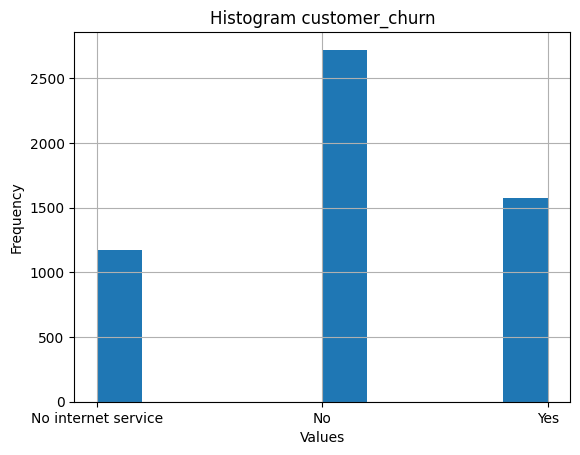

In [11]:
customer_churn['OnlineSecurity'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer_churn')
plt.show()

In [12]:
customer_churn['OnlineSecurity'].fillna(customer_churn['OnlineSecurity'].mode()[0], inplace=True)

/tmp/ipython-input-1956210089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['OnlineSecurity'].fillna(customer_churn['OnlineSecurity'].mode()[0], inplace=True)


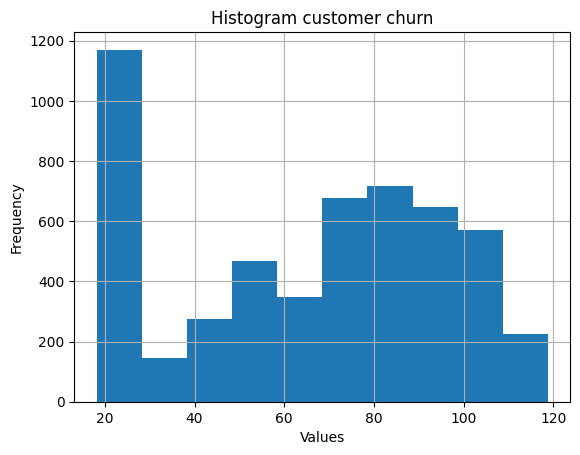

In [13]:
customer_churn['MonthlyCharges'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer churn')
plt.show()

In [14]:
customer_churn['MonthlyCharges'].fillna(customer_churn['MonthlyCharges'].median(), inplace=True)


/tmp/ipython-input-2926586372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['MonthlyCharges'].fillna(customer_churn['MonthlyCharges'].median(), inplace=True)


In [15]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

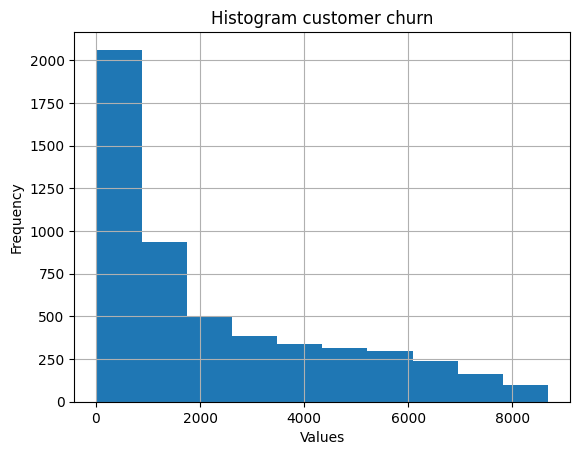

In [16]:
customer_churn['TotalCharges'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer churn')
plt.show()

In [17]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'],errors='coerce')

In [18]:
customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-727921666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median(), inplace=True)


In [19]:
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


identify num col

In [20]:
num_cols = customer_churn.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

outlier

In [21]:
outlier = {}

for col in num_cols:
    Q1 = customer_churn[col].quantile(0.25)
    Q3 = customer_churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = customer_churn[(customer_churn[col] < lower) | (customer_churn[col] > upper)]
    outlier[col] = outliers.shape[0]

outlier


{'SeniorCitizen': 900, 'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 24}

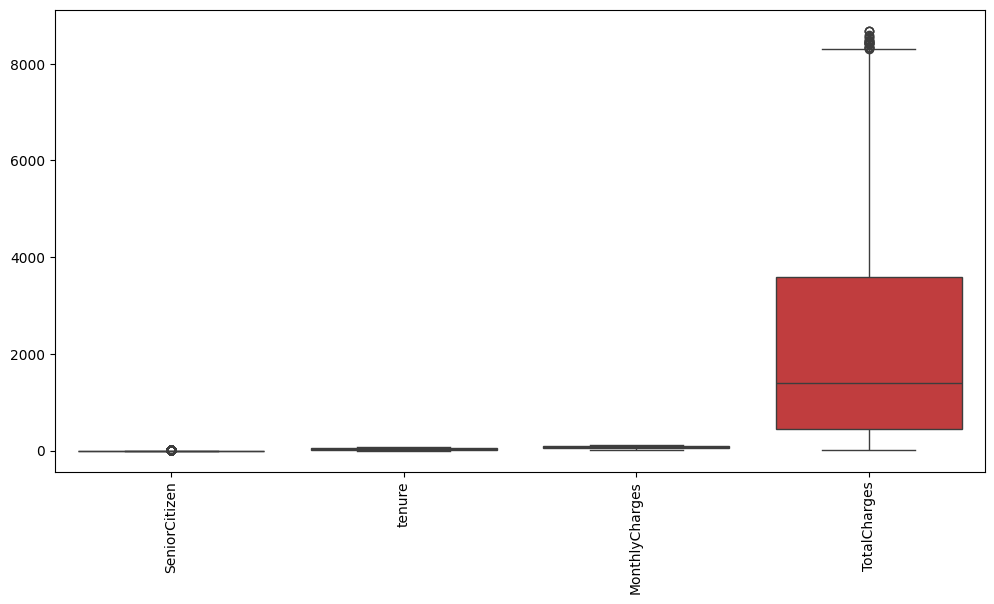

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=customer_churn[num_cols])
plt.xticks(rotation=90)
plt.show()

handle outlier and replacing extreme values with acceptable lower and upper limits.

In [23]:
for col in num_cols:
    Q1 = customer_churn[col].quantile(0.25)
    Q3 = customer_churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    customer_churn[col] = customer_churn[col].clip(lower, upper)

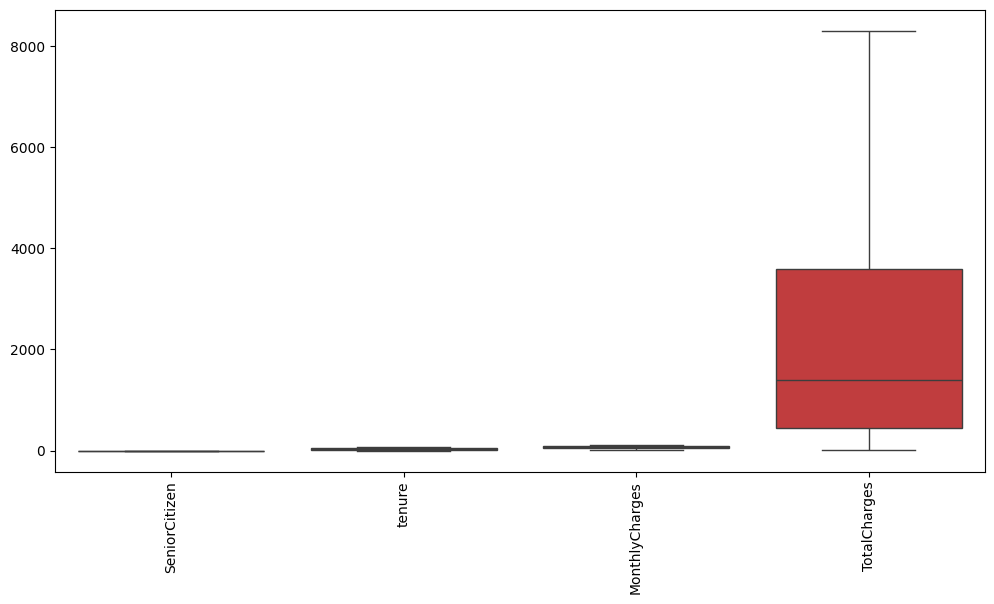

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=customer_churn[num_cols])
plt.xticks(rotation=90)
plt.show()

change text to numeric

In [25]:
customer_churn['Churn'] = customer_churn['Churn'].map({'No': 0, 'Yes': 1})
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,0
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,0
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,0
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,0
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,0
5630,3908-MKIMJ,Male,0,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,0
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,0
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30,0


In [26]:
customer_churn['Churn'].value_counts(dropna=False)


,count
Churn,
0,4130
1,1504


encoding

In [27]:
customer_churn.drop('customerID', axis=1, inplace=True)

In [28]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for col in binary_cols:
  customer_churn[col] = customer_churn[col].map({'Yes': 1, 'No': 0})


In [29]:
multi_cols = ['gender','InternetService','Contract','PaymentMethod','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineSecurity','MultipleLines','OnlineBackup']
customer_churn = pd.get_dummies(customer_churn, columns=multi_cols, drop_first=True)


scaling

In [30]:
scaler = StandardScaler()
customer_churn[num_cols] = scaler.fit_transform(customer_churn[num_cols])
customer_churn[num_cols]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.097232,-1.541793,-0.694206
1,0.0,-0.187173,-1.024876,-0.576355
2,0.0,0.950447,1.141008,1.509992
3,0.0,0.259749,-1.552131,-0.653763
4,0.0,0.422266,-0.490728,-0.038831
...,...,...,...,...
5629,0.0,0.747300,1.154792,1.264805
5630,0.0,1.437998,-0.811217,0.328859
5631,0.0,1.600515,-1.569362,-0.413115
5632,0.0,1.478627,0.584460,1.498363


In [31]:
customer_churn.columns


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'gender_Unknown', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes'],
      dtype='object')

In [32]:
customer_churn['tenure']


,tenure
0,0.097232
1,-0.187173
2,0.950447
3,0.259749
4,0.422266
...,...
5629,0.747300
5630,1.437998
5631,1.600515
5632,1.478627


create interaction features

In [33]:
customer_churn['Tenure_Contract_OneYear'] = (customer_churn['tenure'] * customer_churn['Contract_One year'])
customer_churn['Tenure_Contract_TwoYear'] = (customer_churn['tenure'] * customer_churn['Contract_Two year'])



feature selection


In [34]:
#To keep only important features that influence Churn and remove useless ones before building the model.
corr = customer_churn.select_dtypes(include=['number']).corr()['Churn'].abs()
# Select  features
features = corr[corr > 0.1].index
# Separate features and target
X = customer_churn.drop('Churn', axis=1)
y = customer_churn['Churn']
features

Index(['Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Tenure_Contract_TwoYear'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
train_columns = X_train.columns

In [37]:
X_train.shape

(4507, 33)

In [38]:
lr = LogisticRegression(max_iter=1000)# created a lr object
param_grid = {'C': [0.01, 0.1, 1, 10],'penalty': ['l2'],'solver': ['lbfgs']}# define grid and c is controls regularization small C more strict large C less strict


In [39]:
grid_lr = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1) # create oect in gridsearchcv

In [40]:
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

ML models

KNN

In [41]:
acc_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
#intialization the classifier for iteration
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p=2)

#training the ML model
  classifier.fit(X_train,y_train)

#predict using the trained ML model
  y_pred = classifier.predict(X_test)

#evaluate the ML model
  acc = accuracy_score(y_test,y_pred)

#populate acc_list with accuracy achived for each value of 'k'
  acc_list.append(acc)


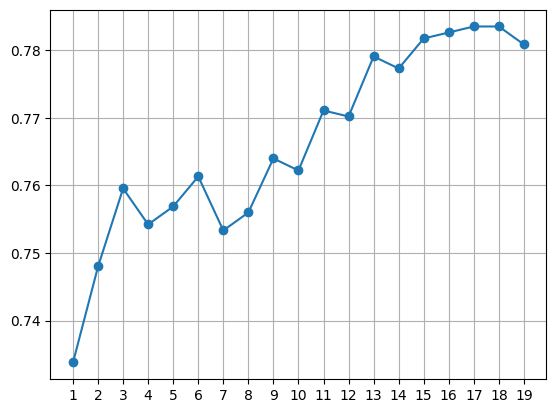

In [42]:
plt.plot(neighbors_range,acc_list,'o-')
plt.xlabel ='no of neighors (k)'
plt.ylabel = 'accuracy score'
plt.xticks(neighbors_range)
#plt.show()
plt.grid()

In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors= 17,metric='manhattan')
knn_classifier.fit(X_train,y_train)
#predict using the trained ML model
y_pred_knn = knn_classifier.predict(X_test)
#evaluate the ML model
acc_knn = accuracy_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test,y_pred_knn)
Rec_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

print("the accuracy of kneighors model is :",acc_knn)
print("the precision of kneighors model is :",prec_knn)
print("the recall of kneighors model is :",Rec_knn)
print("the f1 of kneighors model is :",f1_knn)
confusion_matrix(y_test,y_pred_knn)

the accuracy of kneighors model is : 0.7808340727595386
the precision of kneighors model is : 0.6241379310344828
the recall of kneighors model is : 0.567398119122257
the f1 of kneighors model is : 0.5944170771756979


array([[699, 109],
       [138, 181]])

Logistic regression

In [44]:
# initialising the ML model
model_lg = LogisticRegression()
# training the model using taining features and training targets
model_lg.fit(X_train,y_train)
# predict using the model and test features
y_pred_lg = model_lg.predict(X_test)

acc_lg = accuracy_score(y_test,y_pred_lg)
prec_lg = precision_score(y_test,y_pred_lg)
Rec_lg = recall_score(y_test,y_pred_lg)
f1_lg = f1_score(y_test,y_pred_lg)

print("the accuracy of logistic regression model is :",acc_lg)
print("the precision of logistic regression model is :",prec_lg)
print("the recall of logistic regression model is :",Rec_lg)
print("the f1 of logistic regression model is :",f1_lg)
confusion_matrix(y_test,y_pred_lg)

the accuracy of logistic regression model is : 0.8021295474711624
the precision of logistic regression model is : 0.6846153846153846
the recall of logistic regression model is : 0.5579937304075235
the f1 of logistic regression model is : 0.614853195164076


array([[726,  82],
       [141, 178]])

Naive Bayes

In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test,y_pred_nb)
prec_nb = precision_score(y_test,y_pred_nb)
Rec_nb = recall_score(y_test,y_pred_nb)
f1_nb = f1_score(y_test,y_pred_nb)

print("the accuracy of naive bayes model is :",acc_nb)
print("the precision of naive bayes  model is :",prec_nb)
print("the recall of naive bayes  model is :",Rec_nb)
print("the f1 of naive bayes model is :",f1_nb)
confusion_matrix(y_test,y_pred_nb)

the accuracy of naive bayes model is : 0.6876663708961845
the precision of naive bayes  model is : 0.4716981132075472
the recall of naive bayes  model is : 0.8620689655172413
the f1 of naive bayes model is : 0.6097560975609756


array([[500, 308],
       [ 44, 275]])

DecisionTree

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test,y_pred_dt)
prec_dt = precision_score(y_test,y_pred_dt)
Rec_dt = recall_score(y_test,y_pred_dt)
f1_dt = f1_score(y_test,y_pred_dt)

print("the accuracy of decision tree model is :",acc_dt)
print("the precision of decision tree  model is :",prec_dt)
print("the recall of decision tree  model is :",Rec_dt)
print("the f1 of decision tree model is :",f1_dt)
confusion_matrix(y_test,y_pred_dt)

the accuracy of decision tree model is : 0.7311446317657497
the precision of decision tree  model is : 0.5251572327044025
the recall of decision tree  model is : 0.5235109717868338
the f1 of decision tree model is : 0.5243328100470958


array([[657, 151],
       [152, 167]])

svm

In [47]:
#intialization the classifier for iteration
svm = SVC()
#training the ML model
svm.fit(X_train, y_train)
#predict using the trained ML model
y_pred_svm = svm.predict(X_test)
#evaluate the ML model
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("the accuracy of decision classifier model is :",acc_svm)
print("the precision of decision classifier  model is :",prec_svm)
print("the recall of decision classifier  model is :",rec_svm)
print("the f1 of ndecision classifier model is :",f1_svm)
confusion_matrix(y_test,y_pred_svm)

the accuracy of decision classifier model is : 0.7914818101153505
the precision of decision classifier  model is : 0.6909090909090909
the recall of decision classifier  model is : 0.47648902821316613
the f1 of ndecision classifier model is : 0.5640074211502782


array([[740,  68],
       [167, 152]])

load test

In [49]:
testing = pd.read_csv('/content/Testing_data.csv')
testing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [50]:
testing = testing.drop('Churn', axis=1)

In [51]:
testing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15


In [52]:
testing = testing.drop('customerID', axis=1)

In [53]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for col in binary_cols:
  testing[col] = testing[col].map({'Yes': 1, 'No': 0})


In [54]:
multi_cols = ['gender','InternetService','Contract','PaymentMethod','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineSecurity','MultipleLines','OnlineBackup']
testing = pd.get_dummies(testing, columns=multi_cols, drop_first=True)

In [55]:
testing['TotalCharges'] = pd.to_numeric(testing['TotalCharges'],errors='coerce')

In [56]:
testing['TotalCharges'].fillna(testing['TotalCharges'].median(),inplace=True)

/tmp/ipython-input-106253359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testing['TotalCharges'].fillna(testing['TotalCharges'].median(),inplace=True)


In [57]:
testing[num_cols] = scaler.transform(testing[num_cols])


In [58]:
missing_cols = ['Tenure_Contract_OneYear', 'Tenure_Contract_TwoYear', 'gender_Unknown']
for col in missing_cols:
    if col not in testing.columns:
        testing[col] = 0

In [59]:
testing

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,DeviceProtection_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Tenure_Contract_OneYear,Tenure_Contract_TwoYear,gender_Unknown
0,0.0,1,1,0.300378,1,1,0.541384,0.476337,True,True,...,True,False,False,False,True,False,False,0,0,0
1,0.0,1,0,-0.837242,1,0,0.460400,-0.614585,False,False,...,True,False,True,False,True,False,False,0,0,0
2,0.0,0,0,0.422266,1,1,1.189253,0.891492,True,True,...,False,False,False,False,True,False,False,0,0,0
3,0.0,0,0,1.600515,1,1,1.816446,2.849555,True,True,...,True,False,True,False,True,False,True,0,0,0
4,0.0,0,0,-0.918500,0,0,-1.007645,-0.841639,False,False,...,False,False,False,True,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,0,0,-0.227802,1,0,-0.345991,-0.343204,True,False,...,False,False,True,False,False,False,True,0,0,0
1405,1.0,0,0,-1.243534,1,1,0.343232,-0.939009,False,True,...,False,False,False,False,True,False,False,0,0,0
1406,0.0,1,0,-1.202905,1,1,0.332894,-0.912657,False,True,...,False,False,False,False,True,False,False,0,0,0
1407,0.0,1,1,0.828559,1,0,-1.560747,-0.528144,True,False,...,False,True,False,False,False,True,False,0,0,0


In [60]:
# after one hot encoding the testing and training data will not have same col. so we use this it make the test col same as training col
testing.reindex(columns=X_train.columns, fill_value=0)
testing = testing[train_columns]


In [61]:
y_pred = svm.predict(testing)

In [62]:
pd.DataFrame(y_pred, columns=['Churn_Prediction']).head(20)

,Churn_Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [63]:
customer_churn['Churn'].value_counts()


,count
Churn,
0,4130
1,1504
